In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from pathlib import Path
import pandas as pd

In [3]:
#path = Path('/home/ubuntu/data/autopsy/milestone/suicide_homicide_accident/no_preprocessing')
path = Path('/nfs/research/ejguill/data/autopsy/no_preprocessing/folds/tmp')


In [4]:
df = pd.read_csv(path/'data.csv')
#df.head()

In [5]:
#df.tail()

In [6]:
bs=32

In [7]:
data_clas = TextClasDataBunch.from_csv(path, 'data.csv', bs=bs)

In [8]:
data_clas.show_batch()

text,target
"xxbos \n xxup .micro . \n xxmaj heart - no significant histopathology \n\n xxmaj lungs - patchy extravasation of red blood cells into the intra - alveolar space \n\n xxmaj kidneys - no significant histopathology \n\n xxmaj liver - no significant histopathology \n\n xxmaj hippocampus - no significant histopathology \n\n xxmaj xxunk - vaginal , anal , and oral smears negative for xxunk components . \n .locationhead and neck \n",Homicide
"xxbos \n xxup .micro . \n xxup brain : xxmaj no significant histopathologic diagnosis \n\n xxup heart : xxmaj no significant histopathologic diagnosis \n\n xxup lung : xxmaj variable , intra - alveolar fluid ; patchy alveolar and interstitial hemorrhage \n\n xxup liver : xxmaj mild macro- and microvesicular steatosis \n\n xxup kidney : xxmaj no significant histopathologic diagnosis \n .locationneck \n .injuryfirearm injury . \n xxup .injurydesc . \n",Homicide
"xxbos \n xxup .micro . \n xxup heart : xxmaj marked interstitial fibrosis , hypertrophic myocytes , and areas of collagen deposition ( scar ) with loss of myocytes . \n\n xxup lungs : xxmaj sections of the right and left lung demonstrate septal fibrosis with peripherally dilated alveolar spaces , moderate deposition of black pigment around bronchioles and along the pleura , foci of lymphocytic inflammation around bronchioles ,",Homicide
"xxbos \n xxup .micro . \n xxmaj heart ( xxup a1 ) - no histopathological findings . \n\n xxmaj lungs ( xxup a2 , xxup a3 ) - congestion , focal erythrocyte extravasation . \n\n xxmaj kidney ( xxup a2 , xxup a3 ) - no histopathological findings . \n\n xxmaj liver ( xxup a4 ) - focal autolysis . \n\n xxmaj hippocampus ( xxup a4 ) - no histopathological",Homicide
"xxbos \n xxup .micro . \n xxup none \n .locationhead \n .injurysharp injury . \n xxup .injurydesc . \n xxup stab xxup wound xxup of xxup left xxup temple ( y ) \n\n xxmaj on the left temple , 10 cm below the top of the head , 12.5 cm left of the anterior midline ( measured around the head ) and 4 cm anterior - superior to the left",Homicide


In [9]:
learn = text_classifier_learner(data_clas, drop_mult=0.5, qrnn=True, emb_sz=100, nh=200, nl=1)


In [10]:
learn.unfreeze()
#learn.fit_one_cycle(10, slice(1e-4,1e-2), moms=(0.8,0.7))
learn.fit_one_cycle(10, 1e-1, moms=(0.95,0.8))

epoch,train_loss,valid_loss,accuracy
1,0.531817,0.420538,0.849609
2,0.636834,0.515395,0.834635
3,0.761025,0.561320,0.859375
4,0.680730,1.406769,0.763672
5,0.555222,9.146810,0.782552
6,0.527814,10.290563,0.809896
7,0.545357,2.293115,0.822266
8,0.466112,0.459610,0.888021
9,0.390591,5.653500,0.852865
10,0.414918,32.240406,0.826172


In [11]:
from fastai.vision import *

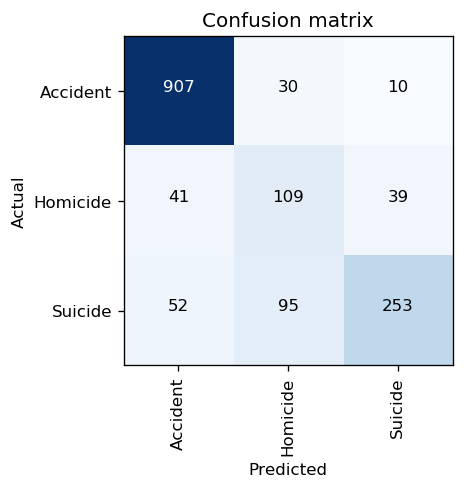

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

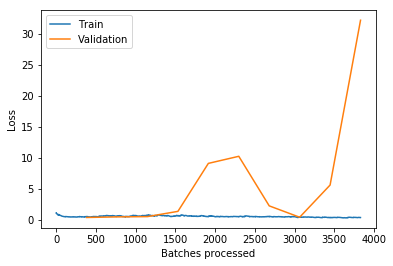

In [13]:
learn.recorder.plot_losses()

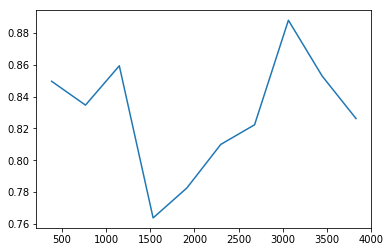

In [14]:
learn.recorder.plot_metrics()

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data_clas.valid_ds)==len(losses)==len(idxs)

True

In [16]:
loss = learn.recorder.losses

In [17]:
len(loss)

3830

In [18]:
len(learn.recorder.val_losses)

10

In [19]:
lrs = learn.recorder.lrs

In [20]:
len(lrs)

3830

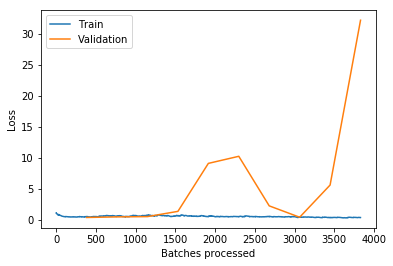

In [21]:
last = ifnone(None,len(learn.recorder.nb_batches))

_, ax = plt.subplots(1,1)
l_b = np.sum(learn.recorder.nb_batches[-last:])
iterations = range_of(learn.recorder.losses)[-l_b:]
ax.plot(iterations, learn.recorder.losses[-l_b:], label='Train')
val_iter = learn.recorder.nb_batches[-last:]
val_iter = np.cumsum(val_iter)+np.sum(learn.recorder.nb_batches[:-last])
ax.plot(val_iter, learn.recorder.val_losses[-last:], label='Validation')
ax.set_ylabel('Loss')
ax.set_xlabel('Batches processed')
ax.legend()

In [22]:
len(learn.metrics)

1

In [23]:
learn.metrics[0]

<function fastai.metrics.accuracy(input:torch.Tensor, targs:torch.Tensor) -> <function NewType.<locals>.new_type at 0x7fe0fa1a7048>>

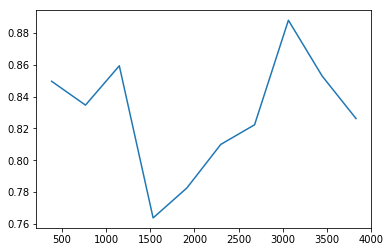

In [24]:
"Plot metrics collected during training."
assert len(learn.metrics) != 0, "There are no metrics to plot."
_, axes = plt.subplots(len(learn.metrics),1,figsize=(6, 4*len(learn.metrics)))
val_iter = learn.recorder.nb_batches
val_iter = np.cumsum(val_iter)
axes = axes.flatten() if len(learn.metrics) != 1 else [axes]
for i, ax in enumerate(axes):
    values = [met[i] for met in learn.recorder.metrics]
    ax.plot(val_iter, values)


In [25]:
learn.recorder.metrics

[[tensor(0.8496)],
 [tensor(0.8346)],
 [tensor(0.8594)],
 [tensor(0.7637)],
 [tensor(0.7826)],
 [tensor(0.8099)],
 [tensor(0.8223)],
 [tensor(0.8880)],
 [tensor(0.8529)],
 [tensor(0.8262)]]

In [26]:
val_iter

array([ 383,  766, 1149, 1532, 1915, 2298, 2681, 3064, 3447, 3830])

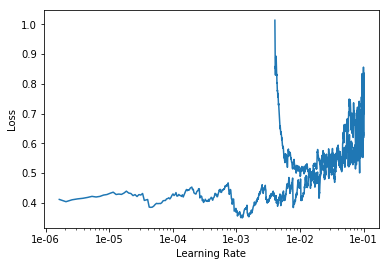

In [27]:
learn.recorder.plot()

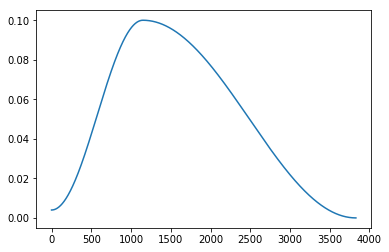

In [28]:
learn.recorder.plot_lr(show_moms=False)

In [29]:
learn.recorder.lrs

[0.004,
 0.004000179419920202,
 0.004000717678339455,
 0.004001614771233869,
 0.0040028706918969065,
 0.00400448543093955,
 0.0040064589762902475,
 0.004008791313195106,
 0.004011482424218005,
 0.004014532289240633,
 0.0040179408854627285,
 0.004021708187402204,
 0.004025834166895323,
 0.004030318793097024,
 0.004035162032480943,
 0.0040403638488398785,
 0.004045924203285922,
 0.0040518430542508255,
 0.004058120357486247,
 0.004064756066064157,
 0.004071750130377097,
 0.0040791024981386426,
 0.004086813114383761,
 0.004094881921469173,
 0.004103308859073854,
 0.004112093864199459,
 0.004121236871170761,
 0.004130737811636226,
 0.00414059661456842,
 0.004150813206264606,
 0.004161387510347281,
 0.0041723194477647635,
 0.004183608936791719,
 0.004195255893029881,
 0.004207260229408552,
 0.0042196218561853654,
 0.004232340680946911,
 0.004245416608609401,
 0.004258849541419432,
 0.004272639378954682,
 0.004286786018124669,
 0.004301289353171506,
 0.004316149275670769,
 0.00433136567453215

In [30]:
learn.model.parameters

<bound method Module.parameters of SequentialRNN(
  (0): MultiBatchRNNCore(
    (encoder): Embedding(5286, 100, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(5286, 100, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): QRNNLayer(
        (linear): WeightDropout(
          (module): Linear(in_features=200, out_features=300, bias=True)
        )
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2)
      (2): Linear(in_features=300, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1)
      (6): Linear(in_features=50, out_features=3, bias=True)
    )
  )
)>

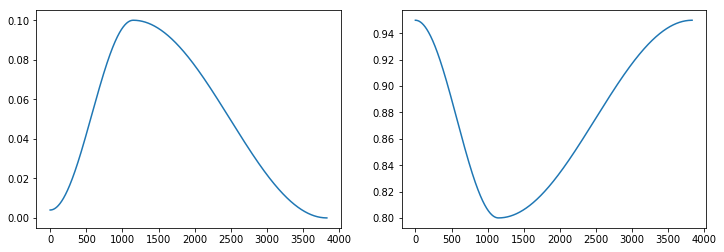

In [31]:
show_moms = True
"Plot learning rate, `show_moms` to include momentum."
iterations = range_of(learn.recorder.lrs)
if show_moms:
    _, axs = plt.subplots(1,2, figsize=(12,4))
    axs[0].plot(iterations, learn.recorder.lrs)
    axs[1].plot(iterations, learn.recorder.moms)
else: 
    plt.plot(iterations, learn.recorder.lrs)

In [32]:
learn.recorder.lrs

[0.004,
 0.004000179419920202,
 0.004000717678339455,
 0.004001614771233869,
 0.0040028706918969065,
 0.00400448543093955,
 0.0040064589762902475,
 0.004008791313195106,
 0.004011482424218005,
 0.004014532289240633,
 0.0040179408854627285,
 0.004021708187402204,
 0.004025834166895323,
 0.004030318793097024,
 0.004035162032480943,
 0.0040403638488398785,
 0.004045924203285922,
 0.0040518430542508255,
 0.004058120357486247,
 0.004064756066064157,
 0.004071750130377097,
 0.0040791024981386426,
 0.004086813114383761,
 0.004094881921469173,
 0.004103308859073854,
 0.004112093864199459,
 0.004121236871170761,
 0.004130737811636226,
 0.00414059661456842,
 0.004150813206264606,
 0.004161387510347281,
 0.0041723194477647635,
 0.004183608936791719,
 0.004195255893029881,
 0.004207260229408552,
 0.0042196218561853654,
 0.004232340680946911,
 0.004245416608609401,
 0.004258849541419432,
 0.004272639378954682,
 0.004286786018124669,
 0.004301289353171506,
 0.004316149275670769,
 0.00433136567453215